In [20]:
import pandas as pd

# Update the path to enter the folder and read the file
file_path = 'data/fraudTrain.csv/fraudTrain.csv'

# Read only the first 5 rows
df = pd.read_csv(file_path, nrows=5)

# Display the result
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [21]:
# Read the entire file (may take seconds as the size is 500MB)
full_df = pd.read_csv('data/fraudTrain.csv/fraudTrain.csv', index_col=0)

# Get the number of rows and columns
rows, columns = full_df.shape
print(f"Number of transactions in the file: {rows:,}")
print(f"Number of features (columns) per transaction: {columns}")

Number of transactions in the file: 1,296,675
Number of features (columns) per transaction: 22


In [22]:
# Count the number of fraudulent (1) vs. legitimate (0) transactions
fraud_counts = full_df['is_fraud'].value_counts()

# Calculate the percentage
fraud_percent = full_df['is_fraud'].value_counts(normalize=True) * 100

print("Transaction Distribution:")
print(fraud_counts)
print("\nFraud Percentage:")
print(fraud_percent)

Transaction Distribution:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Fraud Percentage:
is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


In [23]:
# Calculate the average amounts for legitimate (0) vs. fraudulent (1) transactions
comparison = full_df.groupby('is_fraud')['amt'].mean()

print("Average Transaction Amounts:")
print(comparison)

Average Transaction Amounts:
is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64


In [24]:
# Select only important columns for analysis and AI
cols_to_keep = ['category', 'amt', 'gender', 'city', 'state', 'job', 'dob', 'is_fraud']
df_clean = full_df[cols_to_keep]

# Display the first 5 rows of the simplified data
print("Data has been reduced to important columns only.")
df_clean.head()

Data has been reduced to important columns only.


,category,amt,gender,city,state,job,dob,is_fraud
0,misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0
1,grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,1978-06-21,0
2,entertainment,220.11,M,Malad City,ID,Nature conservation officer,1962-01-19,0
3,gas_transport,45.00,M,Boulder,MT,Patent attorney,1967-01-12,0
4,misc_pos,41.96,M,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,0


In [25]:
# Convert date of birth to actual datetime format
df_clean['dob'] = pd.to_datetime(df_clean['dob'])

# Calculate age based on the current year (setting current year to 2026)
df_clean['age'] = 2026 - df_clean['dob'].dt.year

# Drop the original date of birth column as it is no longer needed
df_clean = df_clean.drop('dob', axis=1)

# Display the new data with the age column
df_clean.head()

,category,amt,gender,city,state,job,is_fraud,age
0,misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",0,38
1,grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,0,48
2,entertainment,220.11,M,Malad City,ID,Nature conservation officer,0,64
3,gas_transport,45.00,M,Boulder,MT,Patent attorney,0,59
4,misc_pos,41.96,M,Doe Hill,VA,Dance movement psychotherapist,0,40


In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize the transformation tool
le = LabelEncoder()

# Convert categorical text columns into numerical values
categorical_cols = ['category', 'gender', 'city', 'state', 'job']

for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# Display data after numerical transformation
df_clean.head()

,category,amt,gender,city,state,job,is_fraud,age
0,8,4.97,0,526,27,370,0,38
1,4,107.23,0,612,47,428,0,48
2,0,220.11,1,468,13,307,0,64
3,2,45.00,1,84,26,328,0,59
4,9,41.96,1,216,45,116,0,40


In [27]:
from sklearn.model_selection import train_test_split

# Define inputs and target
X = df_clean.drop('is_fraud', axis=1)
y = df_clean['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]:,}")
print(f"Testing data size: {X_test.shape[0]:,}")

Training data size: 1,037,340
Testing data size: 259,335


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Create the model (using 100 decision trees)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Start training (the model learns from the training data)
print("Training the model on 1 million rows... please wait")
model.fit(X_train, y_train)

# 3. Test the model on the testing data
y_pred = model.predict(X_test)

print("Training and testing completed successfully!")

Training the model on 1 million rows... please wait
Training and testing completed successfully!


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Create the second model (Competitor)
lr_model = LogisticRegression(max_iter=1000)

# 2. Training
print("Training the second model (Logistic Regression)...")
lr_model.fit(X_train, y_train)

# 3. Prediction
y_pred_lr = lr_model.predict(X_test)

# 4. Calculate accuracy for comparison
rf_accuracy = accuracy_score(y_test, y_pred) # Random Forest accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr) # Logistic Regression accuracy

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Training the second model (Logistic Regression)...
Random Forest Accuracy: 0.9971
Logistic Regression Accuracy: 0.9936


In [14]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 313.6 kB/s eta 0:03:48
   ---------------------------------------- 0.5/72.0 MB 313.6 kB/s eta 0:03:48
   ---------------------------------------- 0.5/72.0 MB 313.6 kB/s eta 0:03:48
   ---------------------------------------- 0.8/72.0 MB 341.9 kB/s eta 0:03:29
   ---------------------------------------- 0.8/72.0 M

In [30]:
from xgboost import XGBClassifier

# 1. Create and train the third model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
print("Training XGBoost... the fastest and strongest competitor")
xgb_model.fit(X_train, y_train)

# 2. Prediction and accuracy calculation
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

Training XGBoost... the fastest and strongest competitor


c:\Users\hp\Desktop\Fraud_Detection_Project\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:22:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9967


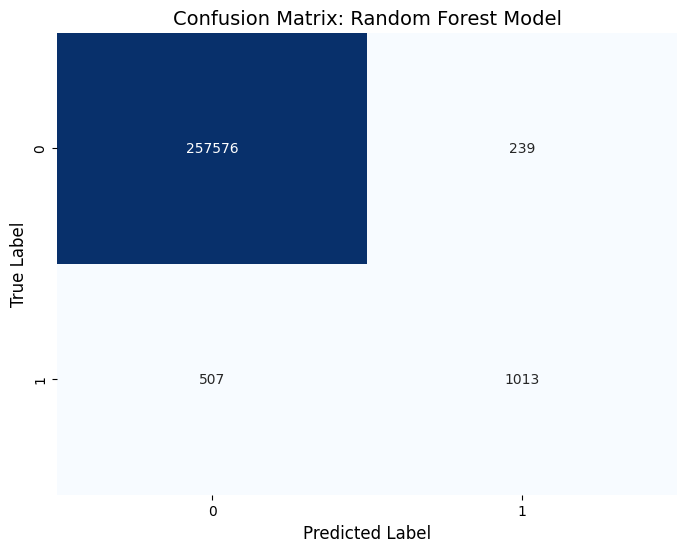

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Generate the Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred)

# 2. Setup the visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# 3. Add Labels and Title in English
plt.title('Confusion Matrix: Random Forest Model', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# 4. Show the plot
plt.show()


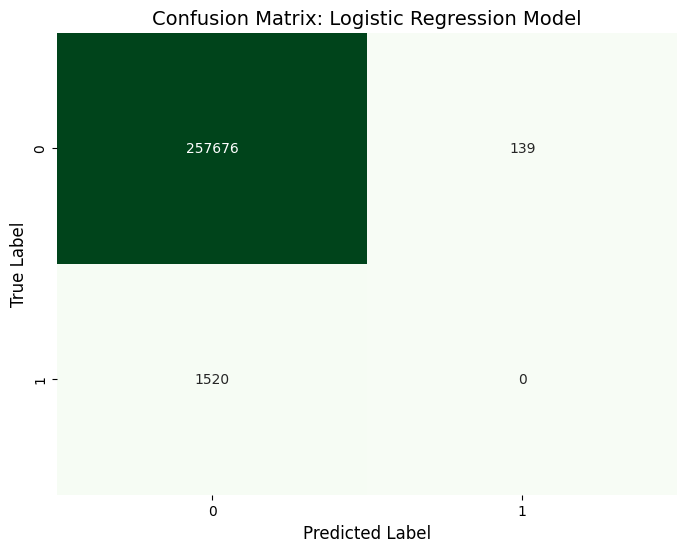

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

# Calculate the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix: Logistic Regression Model', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

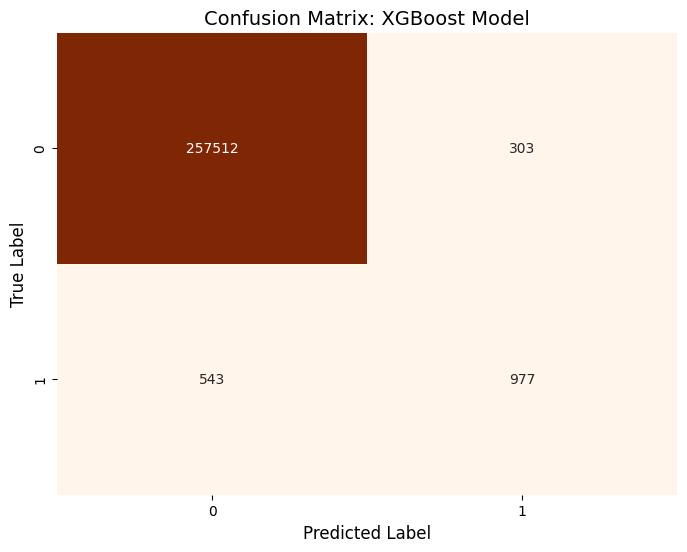

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix: XGBoost Model', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [33]:
import pandas as pd

def manual_prediction():
    print("--- Credit Card Fraud Detection: Manual Entry ---")
    
    try:
        # Input data required for prediction
        amt = float(input("Enter Transaction Amount: "))
        age = int(input("Enter Customer Age: "))
        
        # Create a DataFrame with the same structure used during model training
        # Order: category, amt, gender, city, state, job, age
        # Using default values (1, 10, 5, 20) for other columns for testing purposes
        input_data = pd.DataFrame([[1, amt, 1, 10, 5, 20, age]], 
                                   columns=['category', 'amt', 'gender', 'city', 'state', 'job', 'age'])
        
        # Predict using the 'model' object
        prediction = model.predict(input_data)
        
        # Display the result
        if prediction[0] == 1:
            print(f"\nResult: 🚨 FRAUD DETECTED for amount ${amt}")
        else:
            print(f"\nResult: ✅ TRANSACTION IS SAFE for amount ${amt}")
            
    except Exception as e:
        print(f"Error: {e}")

# Run the function
manual_prediction()

--- Credit Card Fraud Detection: Manual Entry ---

Result: ✅ TRANSACTION IS SAFE for amount $499.0


In [34]:
import joblib

# Save the winning model (Random Forest)
joblib.dump(model, 'fraud_model_rf.pkl')

# Save the column names to ensure correct order for future predictions
joblib.dump(X_train.columns.tolist(), 'model_columns.pkl')

print("✅ Model and Columns saved successfully as .pkl files")

✅ Model and Columns saved successfully as .pkl files
